# Il metodo di Box-Mueller per generare numeri pseudo-casuali Gaussiani

useful references:
  * Lista 4.7
  * Robert Casella, Montecarlo Statistical Methods

Secondo l'algoritmo di Box-M\"uller,
dati due numeri pseudo-casuali $x_1$ ed $x_2$ generati uniformemente nell'intervallo $(0,1)$, 
si dimostra che i due numeri $g_1$ e $g_2$ calcolati con le equazioni seguenti:
\begin{align}
\label{eq:box-mueller}
g_1 &= \sqrt{-2 \log (x_1)} \: \cos{2 \pi{}x_2}
g_2 &= \sqrt{-2 \log (x_1)} \: \sin{2 \pi{}x_2}
\end{align}
possano essere considerati due numeri pseudo-casuali distribuiti secondo una distribuzione Gaussiana.

 * Si scriva una funzione chiamata \verb!generate_gaus_bm! che generi coppie di numeri pseudo-casuali distribuiti
   secondo una densit\`a di probabilit\`a Gaussiana utilizzando l'algoritmo di Box-M\"uller implementata in una libreria dedicata.
 * Si generino $N=1000$ numeri pseudo-casuali utilizzando la funzione appena sviluppata e li si disegni in un istogramma,
   scegliendone con un algoritmo opportuno gli estremi ed il binnaggio.

(array([  0.,   0.,   0.,   1.,   4.,   6.,  14.,  22.,  35.,  44.,  64.,
         92., 119., 117., 122.,  93.,  93.,  75.,  36.,  33.,  17.,   8.,
          5.,   0.]),
 array([-4.        , -3.70833333, -3.41666667, -3.125     , -2.83333333,
        -2.54166667, -2.25      , -1.95833333, -1.66666667, -1.375     ,
        -1.08333333, -0.79166667, -0.5       , -0.20833333,  0.08333333,
         0.375     ,  0.66666667,  0.95833333,  1.25      ,  1.54166667,
         1.83333333,  2.125     ,  2.41666667,  2.70833333,  3.        ]),
 <BarContainer object of 24 artists>)

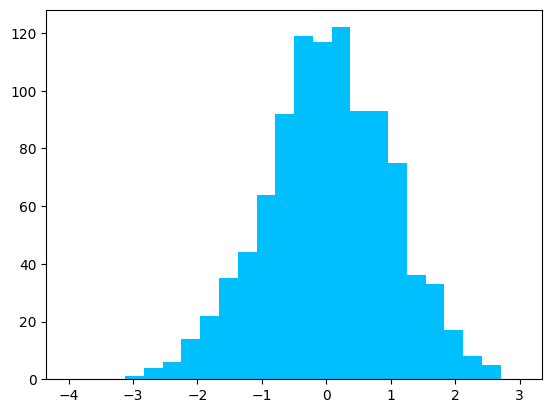

In [3]:
from lib import generate_gaus_bm, sturges
import matplotlib.pyplot as plt
import numpy as np

N = 1000

lista_G = []
for i in range (N//2):
    G1, G2 = generate_gaus_bm ()
    lista_G.append (G1)
    lista_G.append (G2)

lista_min = np.floor (min (lista_G))
lista_max = np.ceil (max (lista_G))

N_bins = sturges (len (lista_G))
bin_content, bin_edges = np.histogram (lista_G, bins = N_bins, range = (lista_min, lista_max))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (lista_G,
         bins = bin_edges,
         color = 'deepskyblue',
        )

 * Si determinino media e varianza della distribuzione ottenuta e relativi errori.

In [9]:
from stats import stats

statistiche = stats (lista_G)

media = statistiche.mean ()
varia = statistiche.variance ()
media_err = statistiche.sigma_mean ()
varia_err = 2 * varia * varia / (len (lista_G) - 1)

print ('media:', media, '±', media_err) 
print ('varianza:', varia, '±', varia_err) 

media: 0.033244445605456044 ± 0.030925358647818656
varianza: 0.956377807496212 ± 0.0018311481695120352


 * Si mostri graficamente che, al variare del numero $N$ di eventi generati, la sigma della distribuzione non cambia, mentre l'errore sulla media si riduce.

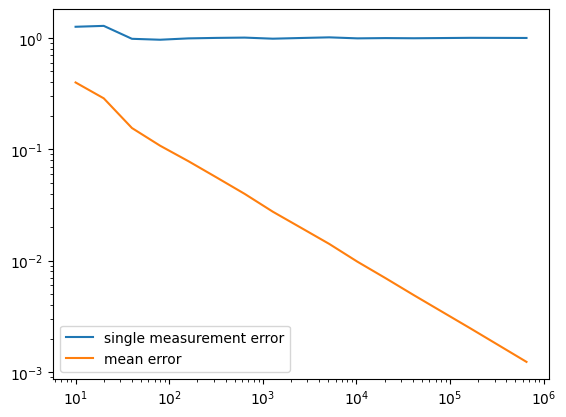

In [16]:
from statistics import stdev

N_max = 1000000

N = 10
sigmas = []
sigmas_mean = []
events = []
while N <= N_max:
    lista = []
    for i in range (N//2):
        print ('N:', N, end = '\r')
        G1, G2 = generate_gaus_bm ()
        lista.append (G1)
        lista.append (G2)
    sigmas.append (stdev (lista))
    sigmas_mean.append (stdev (lista) / np.sqrt (len (lista)))
    events.append (len (lista))
    N *= 2

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.plot (events, sigmas, label = 'single measurement error')
ax.plot (events, sigmas_mean, label = 'mean error')
ax.set_xscale ('log')
ax.set_yscale ('log')
ax.legend ()
plt.show ()

 * Si trasformi l'algoritmo in modo che generi numeri pseudo-casuali con densit\`a di probabilit\`a Gaussiana con media $\mu = 5$ e varianza $\sigma^2 = 4$. Si generi un nuovo campione di $N = 1000$ eventi con il nuovo algoritmo e se ne disegni la distribuzione, sempre scegliendo in modo opportuno gli estremi ed il binnaggio dell'istogramma corrispondente.

media: 4.963218569108511
sigma: 1.9996490279627377


(array([0.000e+00, 4.000e+00, 5.000e+00, 1.000e+01, 1.400e+01, 2.800e+01,
        5.400e+01, 9.900e+01, 1.710e+02, 3.000e+02, 4.430e+02, 5.500e+02,
        7.100e+02, 7.820e+02, 8.870e+02, 9.980e+02, 1.001e+03, 8.650e+02,
        8.650e+02, 6.650e+02, 5.120e+02, 3.970e+02, 2.710e+02, 1.580e+02,
        1.090e+02, 4.800e+01, 3.500e+01, 1.100e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
         2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,
         8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ]),
 <BarContainer object of 32 artists>)

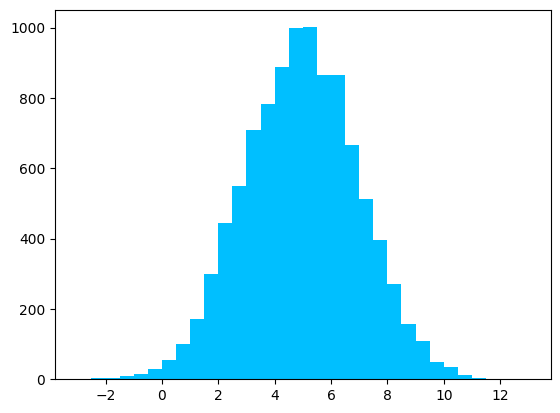

In [18]:
from statistics import mean

N = 10000
mu = 5
sigma = 2

lista_G2 = []
transform = lambda x : x * sigma + mu
for i in range (N//2):
    G1, G2 = generate_gaus_bm ()
    lista_G2.append (transform (G1))
    lista_G2.append (transform (G2))

print ('media:', mean (lista_G2))
print ('sigma:', stdev (lista_G2))

lista_min = np.floor (min (lista_G2))
lista_max = np.ceil (max (lista_G2))

N_bins = sturges (len (lista_G2))
bin_content, bin_edges = np.histogram (lista_G2, bins = N_bins, range = (lista_min, lista_max))

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (lista_G2,
         bins = bin_edges,
         color = 'deepskyblue',
        )